### A neural network that you can watch while it "learns" a curve

This code will create a set of 1000 points, that are arranged in a curvy (non-linear) manner.  It will then create a neural network with 1 neuron in the input layer, 64 neurons in the first and second hidden layers and 1 neuron in the output layer.

The important thing to remember is that we can use the same neural network and it will learn the pattern of any set of 1000 points.

That is, feel free to change equation for the y_data below, and re-run the same program and see it 'learn' those set of points.

Please let me know if any questions.

In [1]:
# Bring in the necessary libaries

import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
import math

In [2]:
# Create the random points on a 2 Dim Cartesian coordinate system

# orig is -10,10,num=1000
x_data = np.linspace(-10, 10, num=1000)
y_data = (0.1*x_data*x_data) + (10 * np.cos(x_data)) - (2.5*x_data) + 0.2*np.random.normal(size=1000)
#y_data = 3* x_data * np.tanh(x_data) + 1.5*np.random.normal(size=600)
math2eng = '0.1x^2 * 10cos(x) - 2.5x'

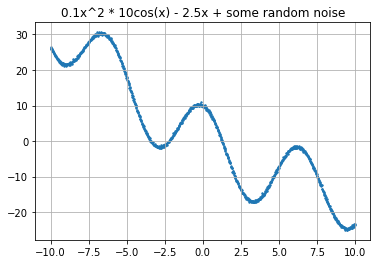

In [3]:
# Display the dataset and save to file

plt.scatter(x_data[::1], y_data[::1], s=2)
plt.title('{} + some random noise'.format(math2eng))
plt.grid()
plt.show()
#plt.savefig('dataset.png',dpi=300) 

In [4]:
# Create the Neural Network model 

model = keras.Sequential()
model.add(keras.layers.Dense(units = 1, activation = 'linear', input_shape=[1]))
model.add(keras.layers.Dense(units = 64, activation = 'relu'))
model.add(keras.layers.Dense(units = 64, activation = 'relu'))
model.add(keras.layers.Dense(units = 1, activation = 'linear'))
model.compile(loss='mse', optimizer="adam")

Metal device set to: Apple M1


2022-06-19 21:47:06.244186: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-06-19 21:47:06.244859: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [5]:
# Display the model

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
 dense_1 (Dense)             (None, 64)                128       
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,355
Trainable params: 4,355
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Global int that keeps track of the current epoch that we are on
current_epoch = 0


def next_n_epochs(n, write_model_data=False):
    """ Runs as many of the as the user desires
    
    Parameters
    ----------
    n : int
        The number of epochs the user wants to run
        The epochs continue from the previous call of this function
    write_model_data : boolean, optional (default is False)
        Whether the user wants to save a text file for each epoch.
        The text file stores model data for that epoch (the weights and biases for each neuron in the NN)
    """
    
    global current_epoch
    
    for x in range(n):
        current_epoch += 1
        
        # One epoch at a time
        history = model.fit( x_data, y_data, epochs=1, verbose=1)
        loss = round(float(*history.history['loss']),2)

        # Compute the output 
        y_predicted = model.predict(x_data)

        # Display the result
        plt.scatter(x_data[::1], y_data[::1], s=2)
        plt.plot(x_data, y_predicted, 'r', linewidth=4)
        plt.title('{}; Epoch #{}; Loss = {}'.format(math2eng, current_epoch, loss))
        plt.grid()
        plt.show()
        #plt.savefig('training-epoch-' + str(x) +'.png',dpi=300) 
        plt.clf()

        filename = '_1x^2+10cosx-2_5x-E{}.txt'.format(current_epoch)

        if (write_model_data):
            with open(filename,'w') as myfile:  
                for layerNum, layer in enumerate(model.layers):
                    weights = layer.get_weights()[0]
                    biases = layer.get_weights()[1]

                    for toNeuronNum, bias in enumerate(biases):
                         myfile.write(f'{layerNum}Bias -> Layer{layerNum+1}Neuron{toNeuronNum}: {bias}')
                         myfile.write('\n')

                    myfile.write('\n')

                    for fromNeuronNum, wgt in enumerate(weights):
                        myfile.write('\n')
                        for toNeuronNum, wgt2 in enumerate(wgt):
                            myfile.write(f'Layer{layerNum}Neuron{fromNeuronNum} -> Layer{layerNum+1}Neuron{toNeuronNum} = {wgt2}')
                            myfile.write('\n')

                    myfile.write('\n')
                    

2022-06-19 21:47:24.145705: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-06-19 21:47:24.329481: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - 0s 2ms/step


2022-06-19 21:47:24.614928: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


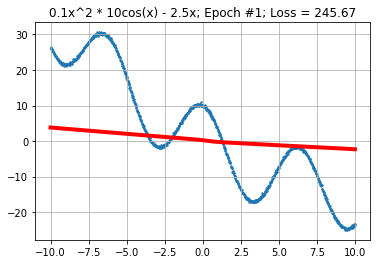

32/32 [==============================] - 0s 1ms/step


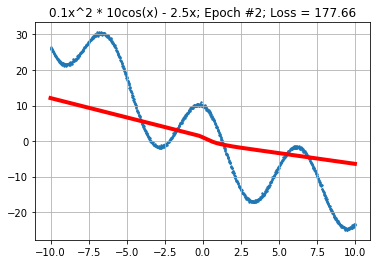

<Figure size 432x288 with 0 Axes>

In [7]:
next_n_epochs(2)

32/32 [==============================] - 0s 1ms/step


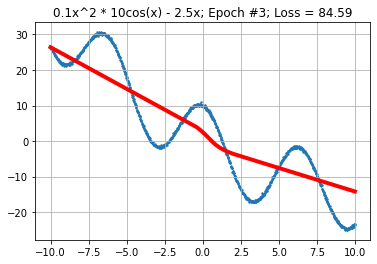

32/32 [==============================] - 0s 1ms/step


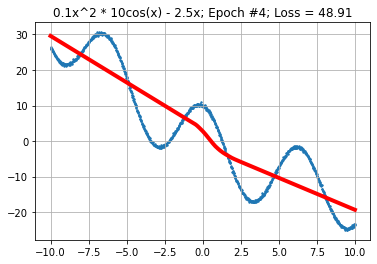

32/32 [==============================] - 0s 1ms/step


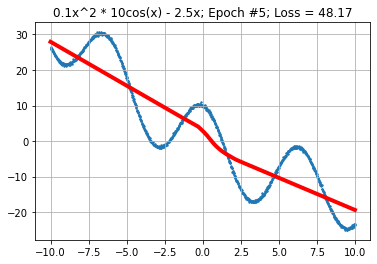

32/32 [==============================] - 0s 1ms/step


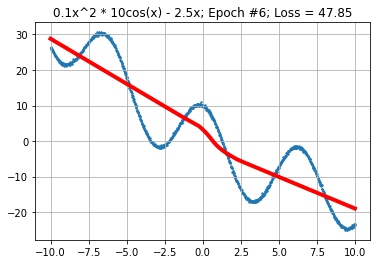

32/32 [==============================] - 0s 1ms/step


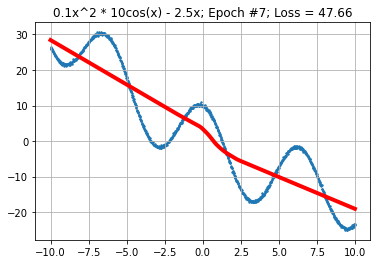

32/32 [==============================] - 0s 1ms/step


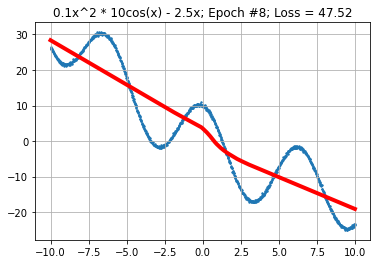

32/32 [==============================] - 0s 1ms/step


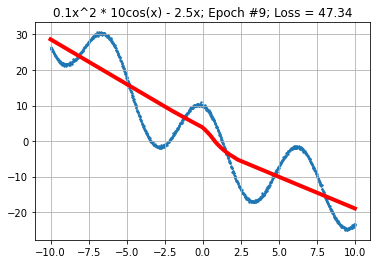

32/32 [==============================] - 0s 1ms/step


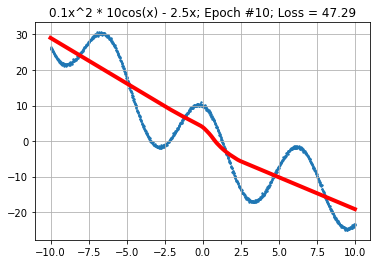

32/32 [==============================] - 0s 1ms/step


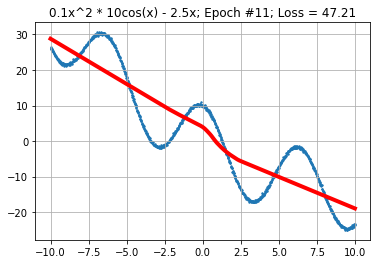

32/32 [==============================] - 0s 1ms/step


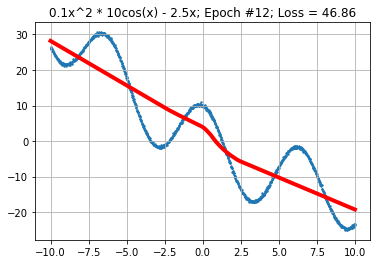

32/32 [==============================] - 0s 1ms/step


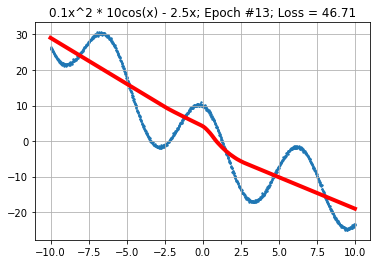

32/32 [==============================] - 0s 2ms/step


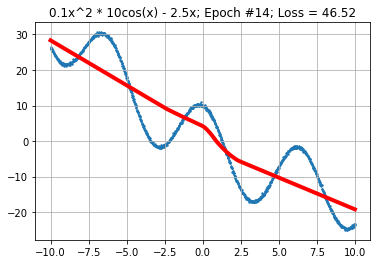

32/32 [==============================] - 0s 2ms/step


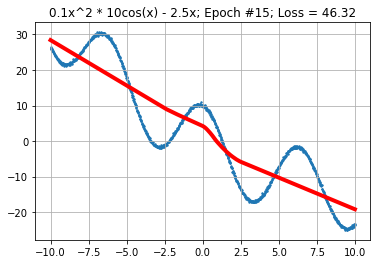

32/32 [==============================] - 0s 1ms/step


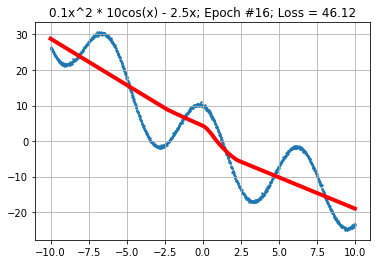

32/32 [==============================] - 0s 1ms/step


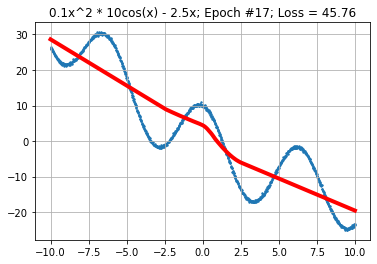

32/32 [==============================] - 0s 1ms/step


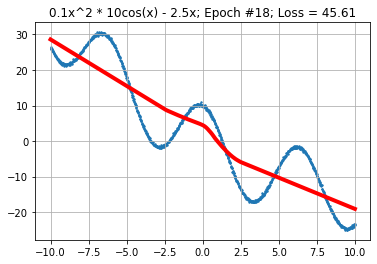

32/32 [==============================] - 0s 1ms/step


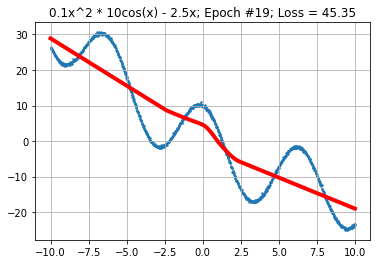

32/32 [==============================] - 0s 1ms/step


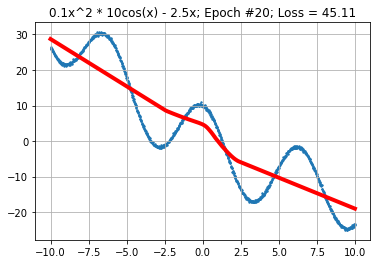

32/32 [==============================] - 0s 1ms/step


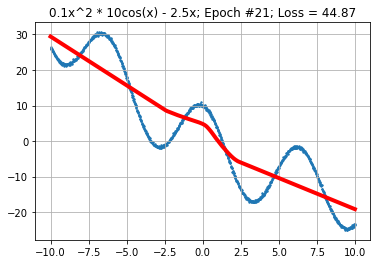

32/32 [==============================] - 0s 1ms/step


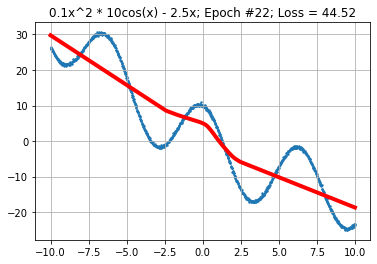

<Figure size 432x288 with 0 Axes>

In [8]:
next_n_epochs(20)

32/32 [==============================] - 0s 1ms/step


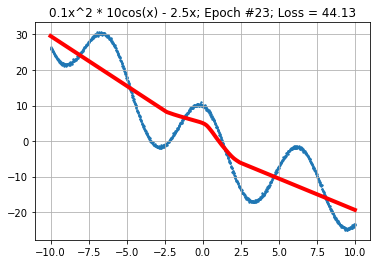

32/32 [==============================] - 0s 1ms/step


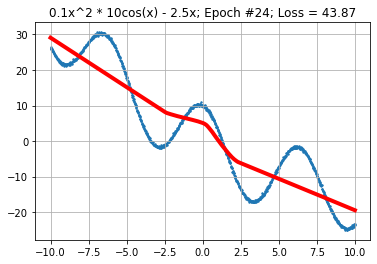

32/32 [==============================] - 0s 1ms/step


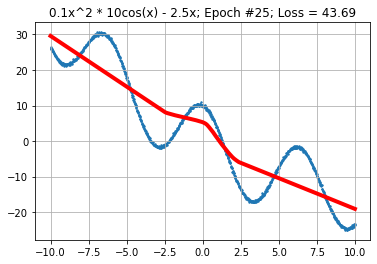

32/32 [==============================] - 0s 1ms/step


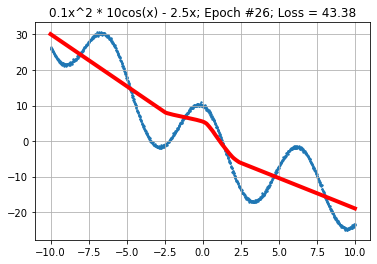

32/32 [==============================] - 0s 1ms/step


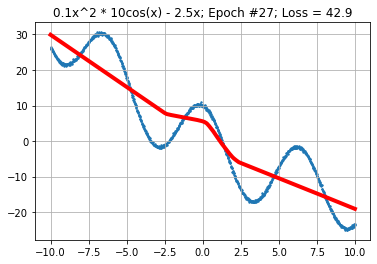

32/32 [==============================] - 0s 1ms/step


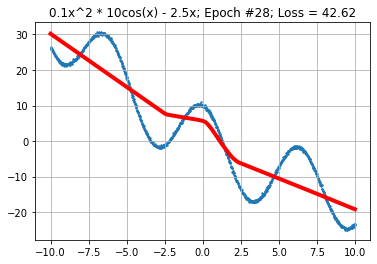

32/32 [==============================] - 0s 1ms/step


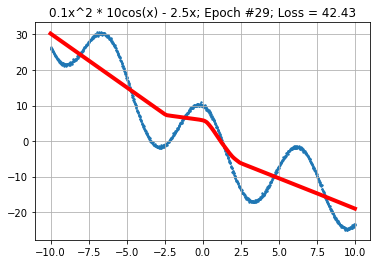

32/32 [==============================] - 0s 1ms/step


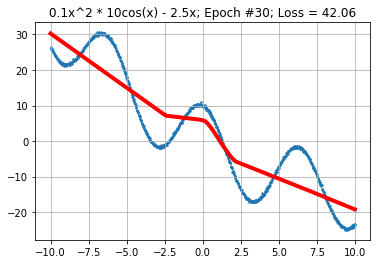

32/32 [==============================] - 0s 1ms/step


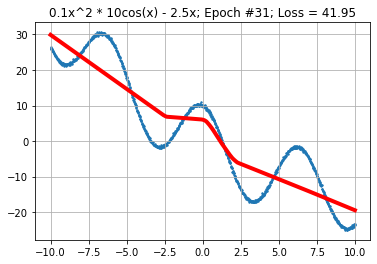

32/32 [==============================] - 0s 1ms/step


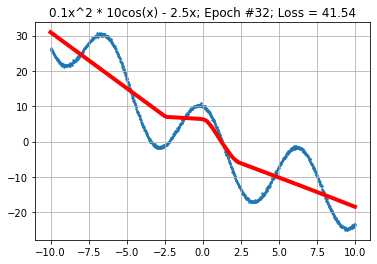

32/32 [==============================] - 0s 1ms/step


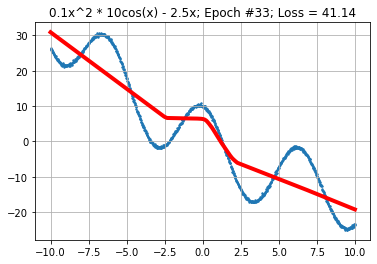

32/32 [==============================] - 0s 1ms/step


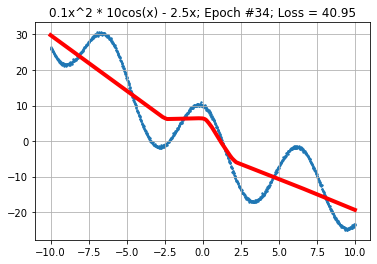

32/32 [==============================] - 0s 1ms/step


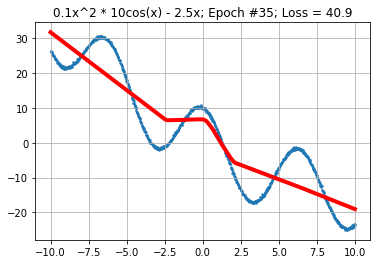

32/32 [==============================] - 0s 1ms/step


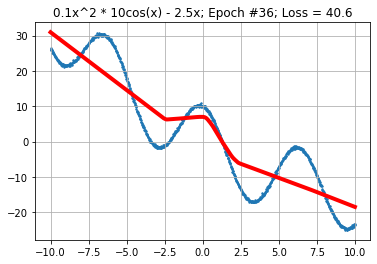

32/32 [==============================] - 0s 1ms/step


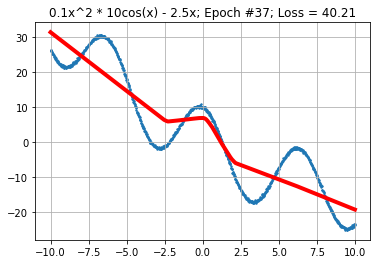

32/32 [==============================] - 0s 1ms/step


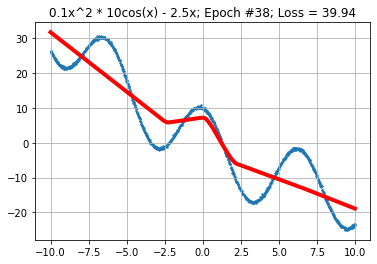

32/32 [==============================] - 0s 1ms/step


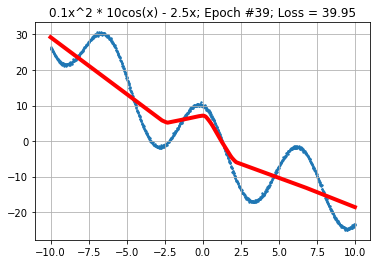

32/32 [==============================] - 0s 1ms/step


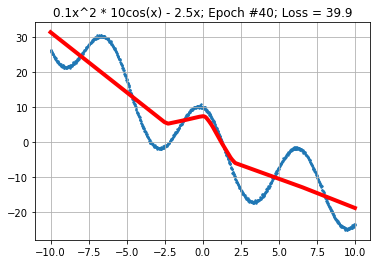

32/32 [==============================] - 0s 1ms/step


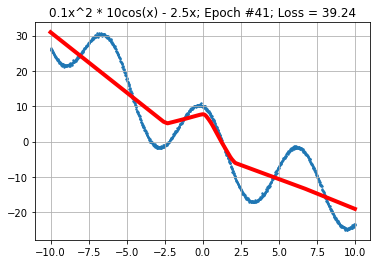

32/32 [==============================] - 0s 1ms/step


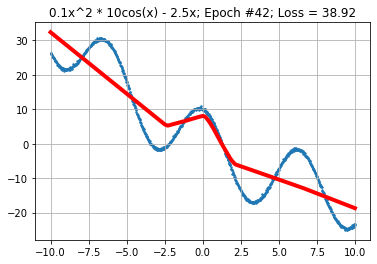

32/32 [==============================] - 0s 1ms/step


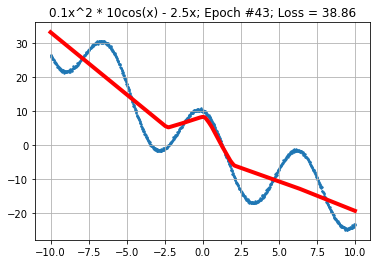

32/32 [==============================] - 0s 1ms/step


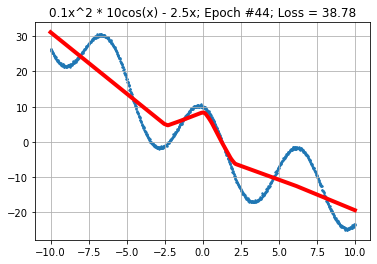

32/32 [==============================] - 0s 1ms/step


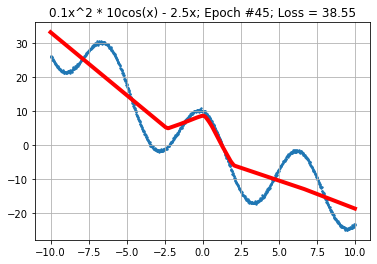

32/32 [==============================] - 0s 1ms/step


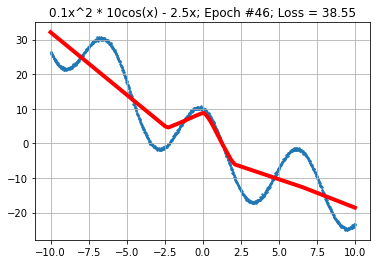

32/32 [==============================] - 0s 1ms/step


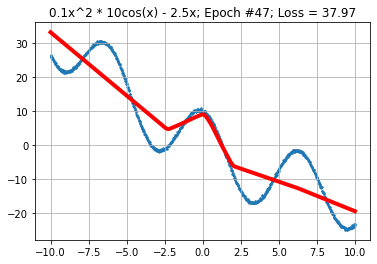

32/32 [==============================] - 0s 1ms/step


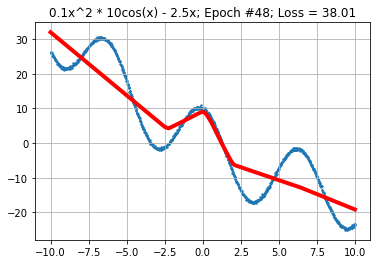

32/32 [==============================] - 0s 1ms/step


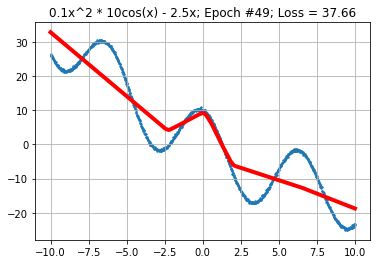

32/32 [==============================] - 0s 1ms/step


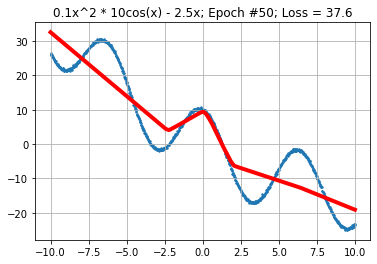

32/32 [==============================] - 0s 1ms/step


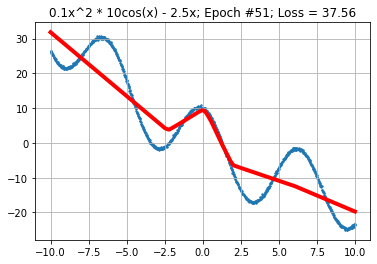

32/32 [==============================] - 0s 1ms/step


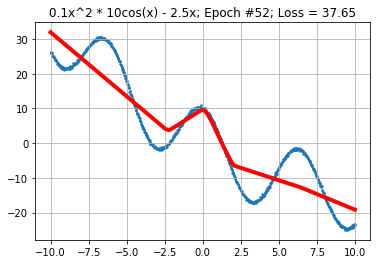

<Figure size 432x288 with 0 Axes>

In [9]:
next_n_epochs(30)

32/32 [==============================] - 0s 1ms/step


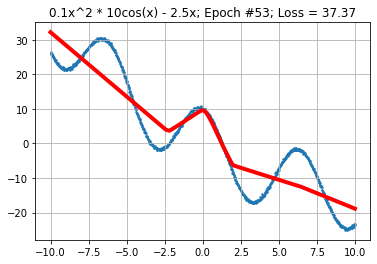

32/32 [==============================] - 0s 1ms/step


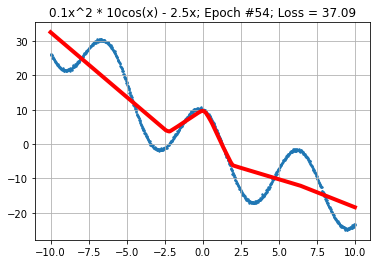

32/32 [==============================] - 0s 1ms/step


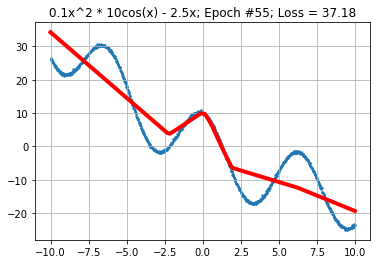

<Figure size 432x288 with 0 Axes>

In [10]:
next_n_epochs(3,True)

32/32 [==============================] - 0s 1ms/step


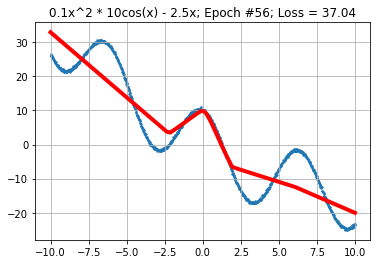

32/32 [==============================] - 0s 1ms/step


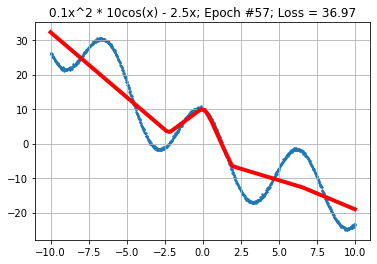

32/32 [==============================] - 0s 1ms/step


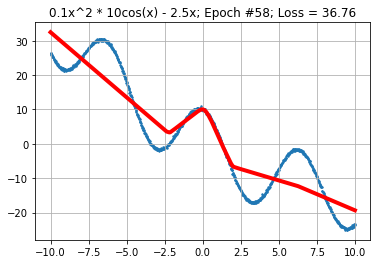

32/32 [==============================] - 0s 1ms/step


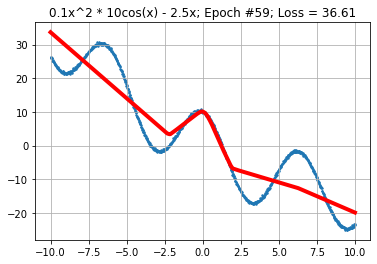

32/32 [==============================] - 0s 1ms/step


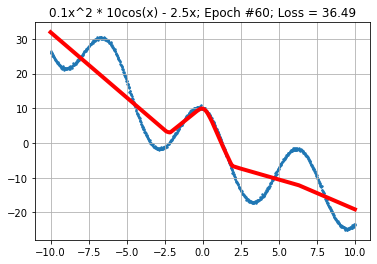

32/32 [==============================] - 0s 1ms/step


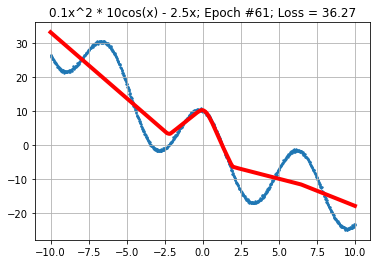

32/32 [==============================] - 0s 1ms/step


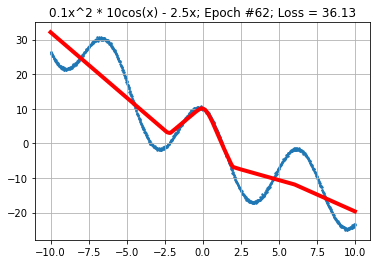

32/32 [==============================] - 0s 1ms/step


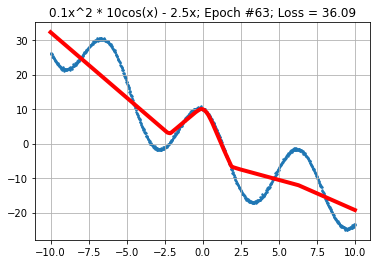

32/32 [==============================] - 0s 1ms/step


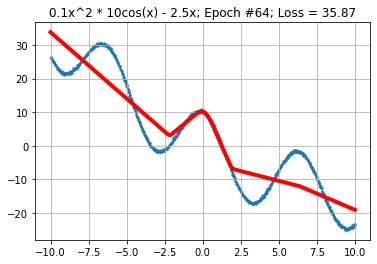

32/32 [==============================] - 0s 1ms/step


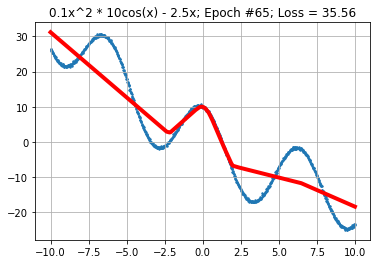

32/32 [==============================] - 0s 1ms/step


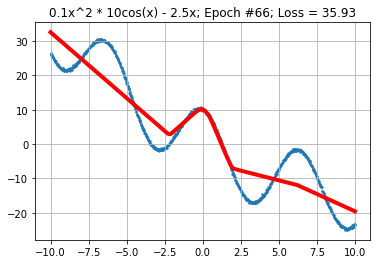

32/32 [==============================] - 0s 1ms/step


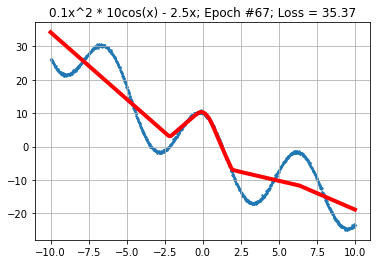

32/32 [==============================] - 0s 1ms/step


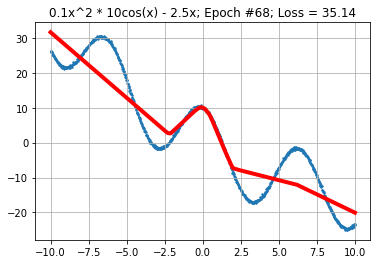

32/32 [==============================] - 0s 1ms/step


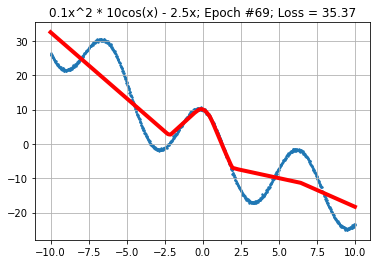

32/32 [==============================] - 0s 1ms/step


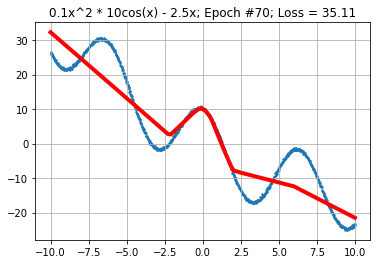

32/32 [==============================] - 0s 1ms/step


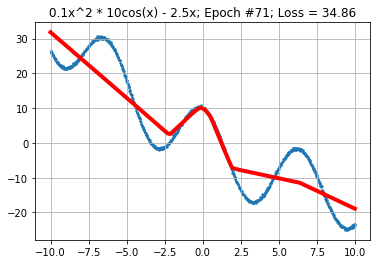

32/32 [==============================] - 0s 1ms/step


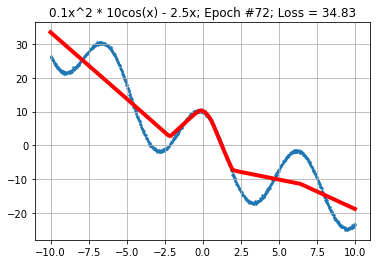

32/32 [==============================] - 0s 1ms/step


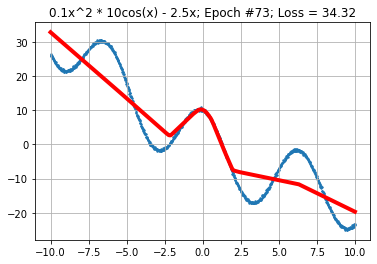

32/32 [==============================] - 0s 1ms/step


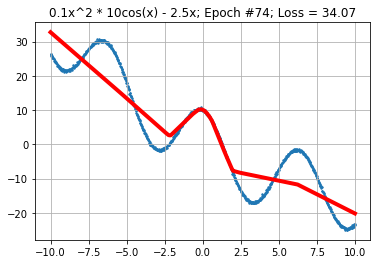

32/32 [==============================] - 0s 1ms/step


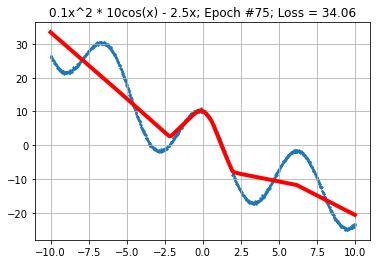

32/32 [==============================] - 0s 1ms/step


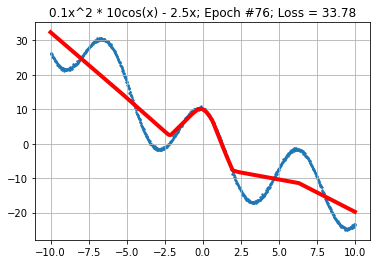

32/32 [==============================] - 0s 1ms/step


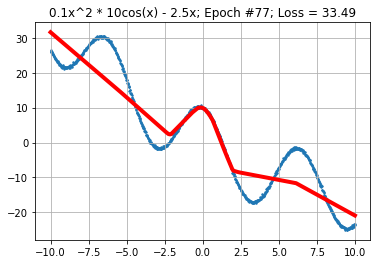

32/32 [==============================] - 0s 1ms/step


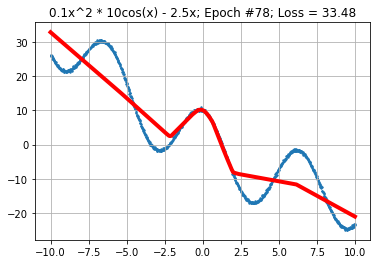

32/32 [==============================] - 0s 1ms/step


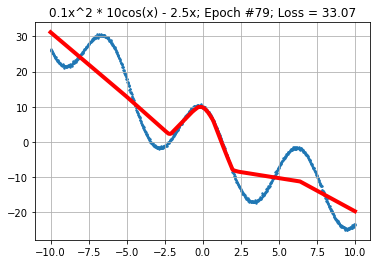

32/32 [==============================] - 0s 1ms/step


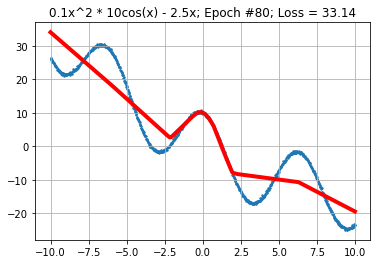

32/32 [==============================] - 0s 1ms/step


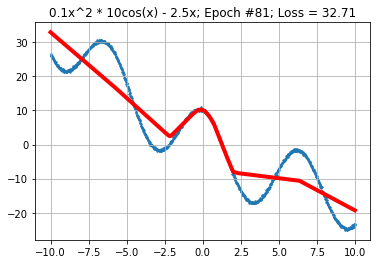

32/32 [==============================] - 0s 1ms/step


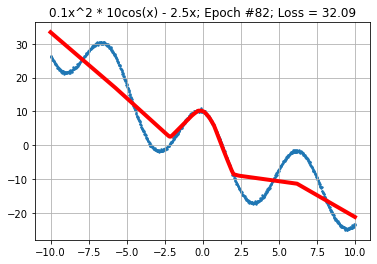

32/32 [==============================] - 0s 1ms/step


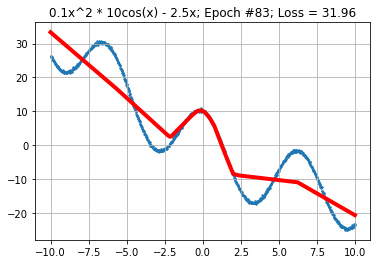

32/32 [==============================] - 0s 1ms/step


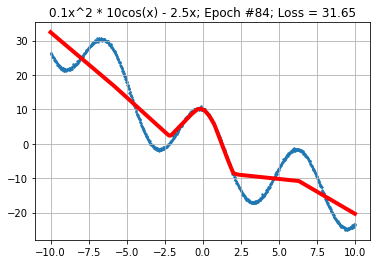

32/32 [==============================] - 0s 1ms/step


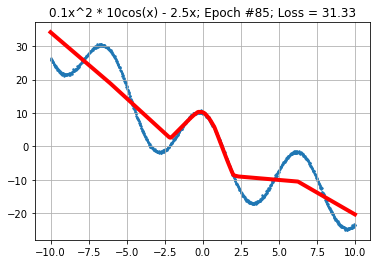

32/32 [==============================] - 0s 1ms/step


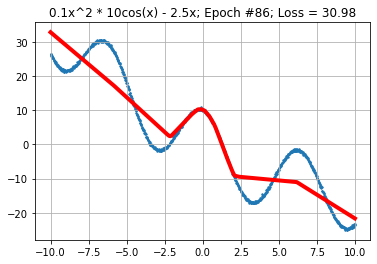

32/32 [==============================] - 0s 1ms/step


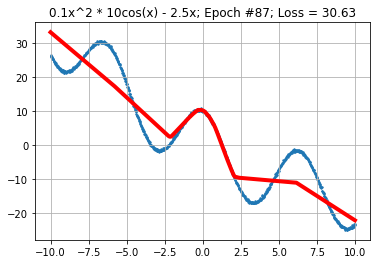

32/32 [==============================] - 0s 1ms/step


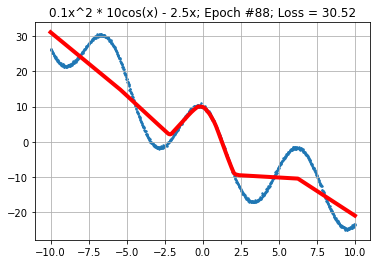

32/32 [==============================] - 0s 1ms/step


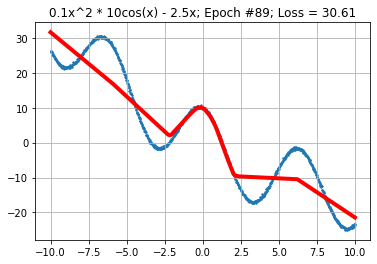

32/32 [==============================] - 0s 1ms/step


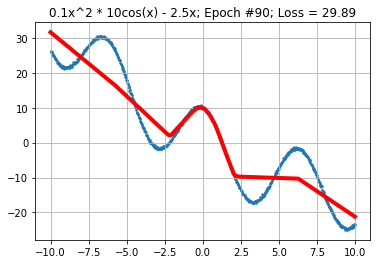

32/32 [==============================] - 0s 1ms/step


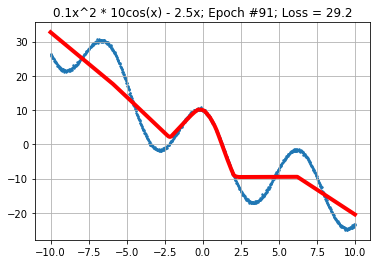

32/32 [==============================] - 0s 1ms/step


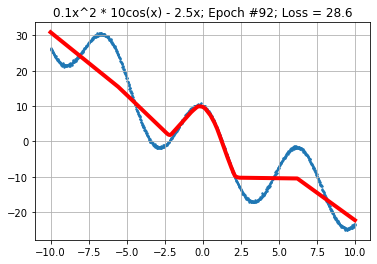

32/32 [==============================] - 0s 1ms/step


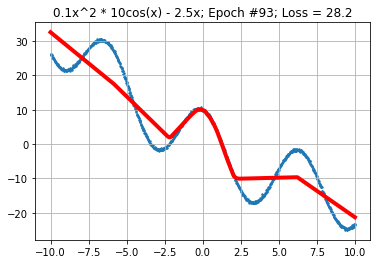

32/32 [==============================] - 0s 1ms/step


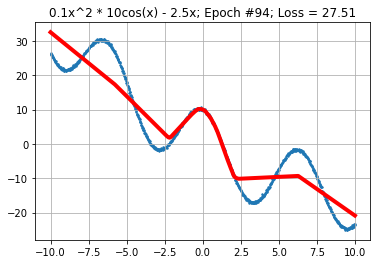

32/32 [==============================] - 0s 1ms/step


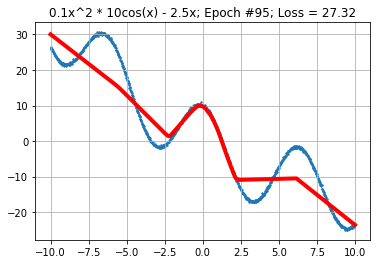

32/32 [==============================] - 0s 1ms/step


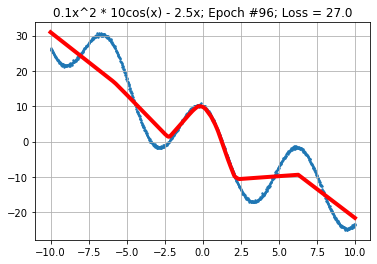

32/32 [==============================] - 0s 1ms/step


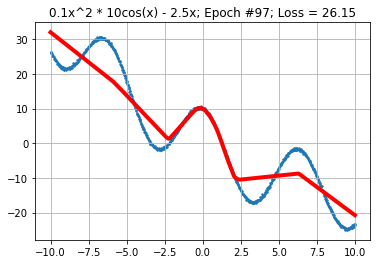

32/32 [==============================] - 0s 1ms/step


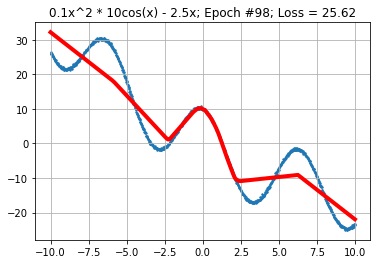

32/32 [==============================] - 0s 1ms/step


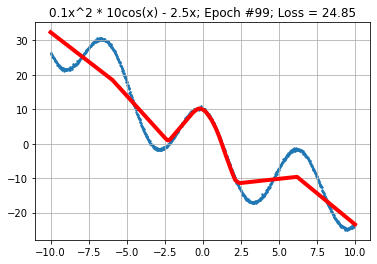

32/32 [==============================] - 0s 1ms/step


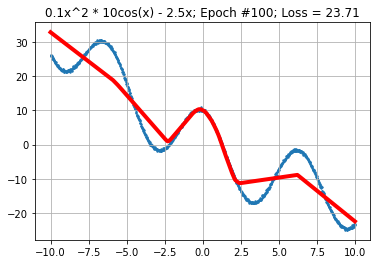

32/32 [==============================] - 0s 1ms/step


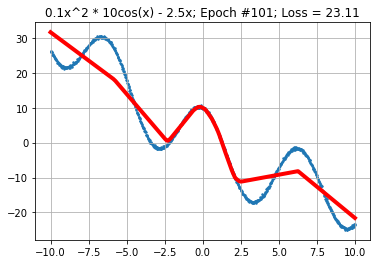

32/32 [==============================] - 0s 2ms/step


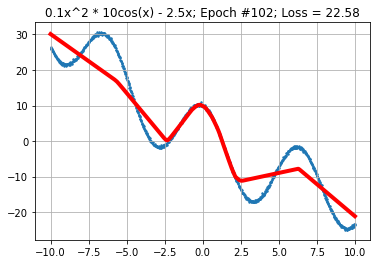

32/32 [==============================] - 0s 1ms/step


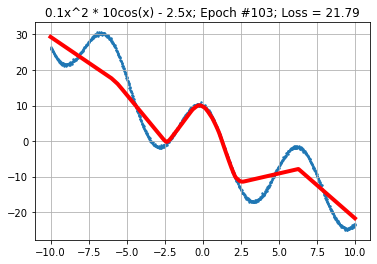

32/32 [==============================] - 0s 1ms/step


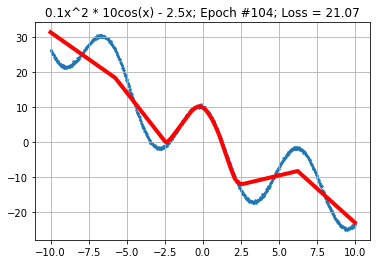

32/32 [==============================] - 0s 1ms/step


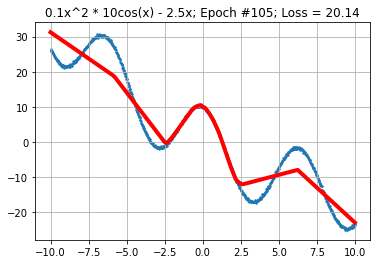

32/32 [==============================] - 0s 1ms/step


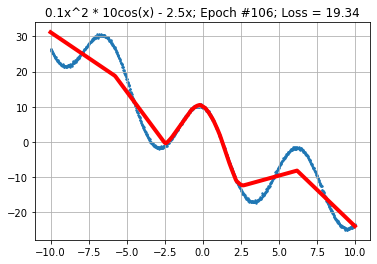

32/32 [==============================] - 0s 1ms/step


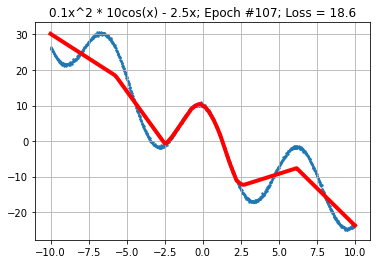

32/32 [==============================] - 0s 1ms/step


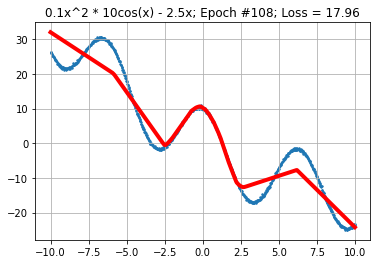

32/32 [==============================] - 0s 1ms/step


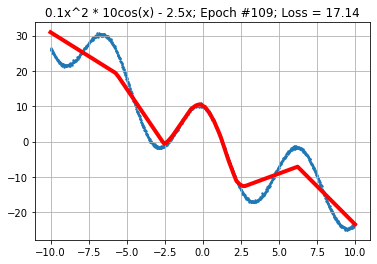

32/32 [==============================] - 0s 1ms/step


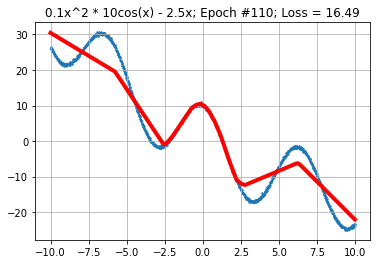

32/32 [==============================] - 0s 1ms/step


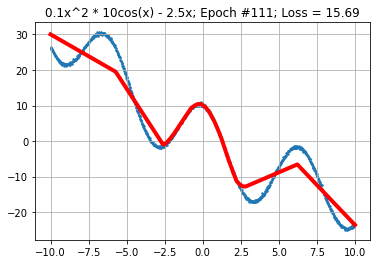

32/32 [==============================] - 0s 1ms/step


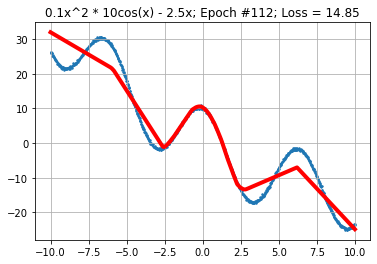

32/32 [==============================] - 0s 1ms/step


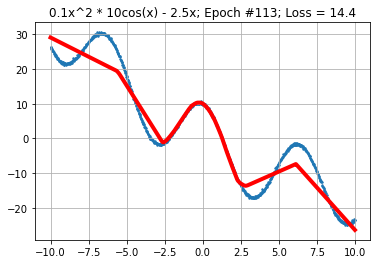

32/32 [==============================] - 0s 1ms/step


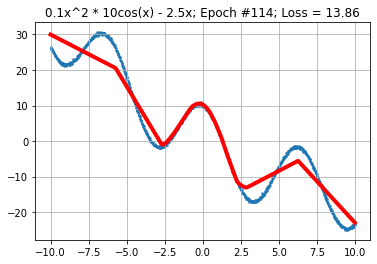

32/32 [==============================] - 0s 1ms/step


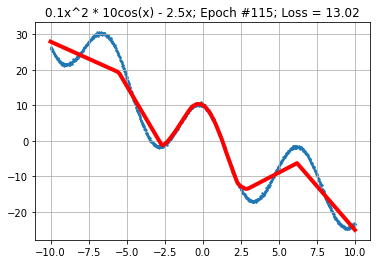

32/32 [==============================] - 0s 1ms/step


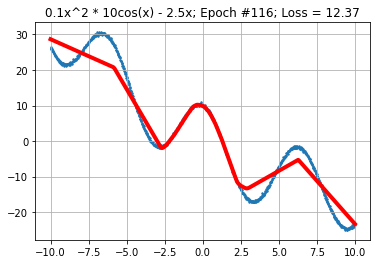

32/32 [==============================] - 0s 1ms/step


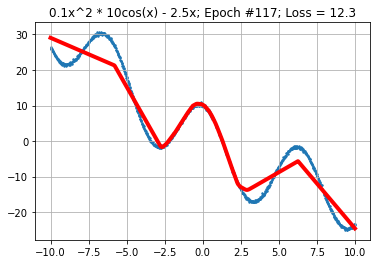

32/32 [==============================] - 0s 1ms/step


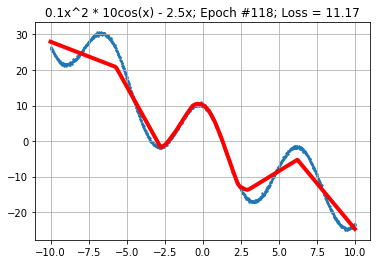

32/32 [==============================] - 0s 1ms/step


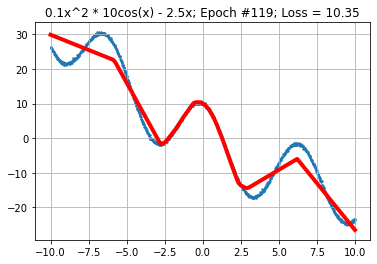

32/32 [==============================] - 0s 1ms/step


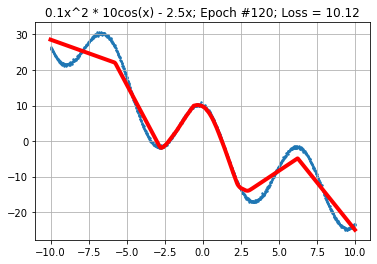

32/32 [==============================] - 0s 1ms/step


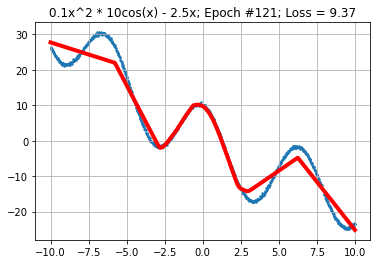

32/32 [==============================] - 0s 1ms/step


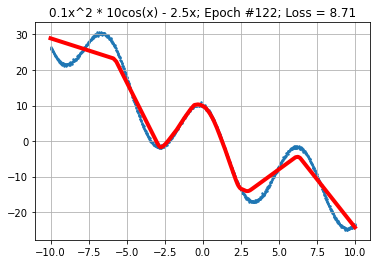

32/32 [==============================] - 0s 1ms/step


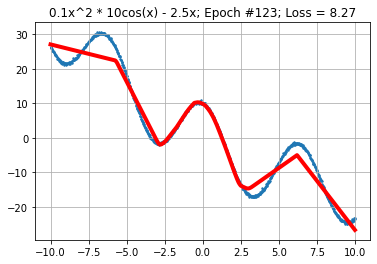

32/32 [==============================] - 0s 1ms/step


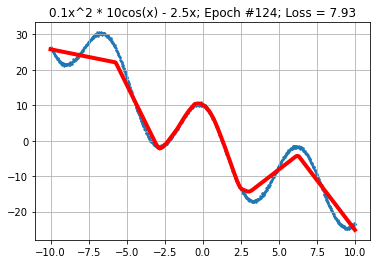

32/32 [==============================] - 0s 1ms/step


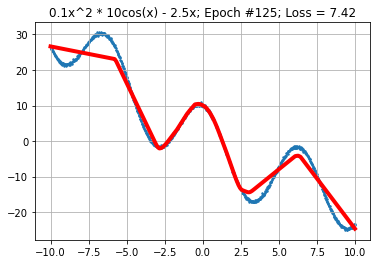

32/32 [==============================] - 0s 1ms/step


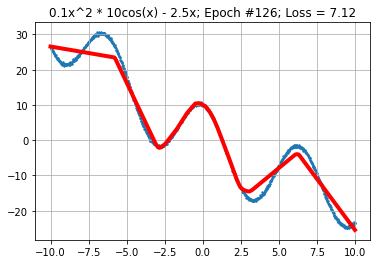

32/32 [==============================] - 0s 1ms/step


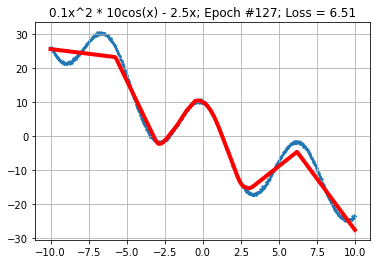

32/32 [==============================] - 0s 1ms/step


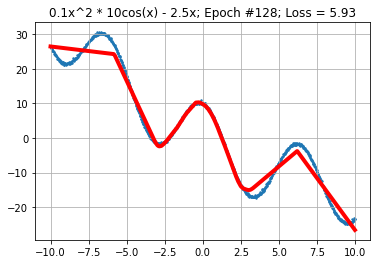

32/32 [==============================] - 0s 1ms/step


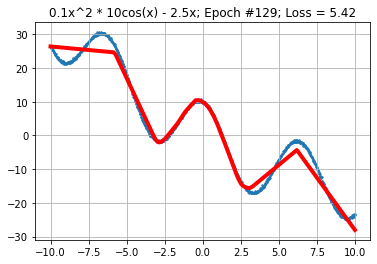

32/32 [==============================] - 0s 1ms/step


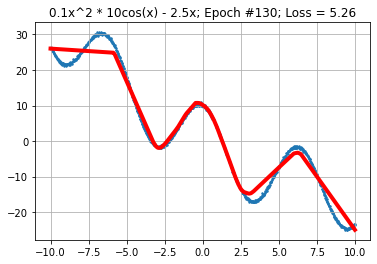

32/32 [==============================] - 0s 1ms/step


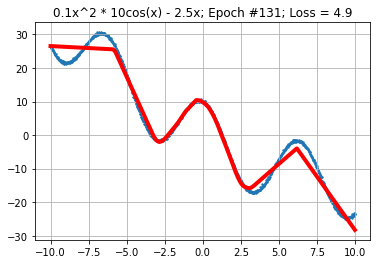

32/32 [==============================] - 0s 1ms/step


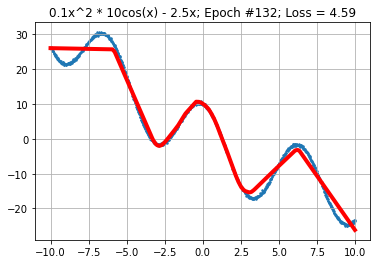

32/32 [==============================] - 0s 1ms/step


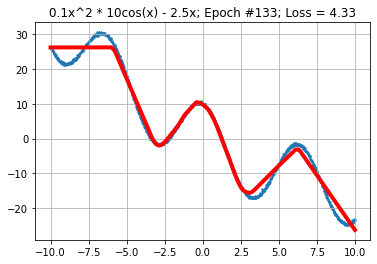

32/32 [==============================] - 0s 1ms/step


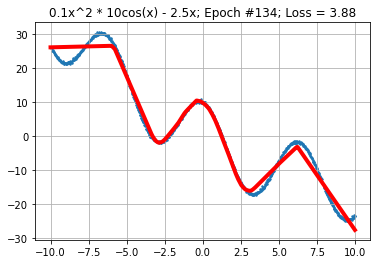

32/32 [==============================] - 0s 1ms/step


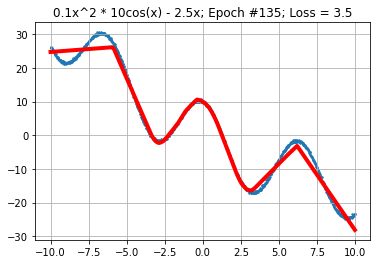

32/32 [==============================] - 0s 1ms/step


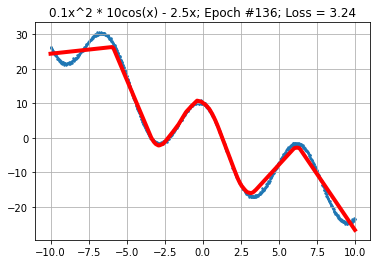

32/32 [==============================] - 0s 1ms/step


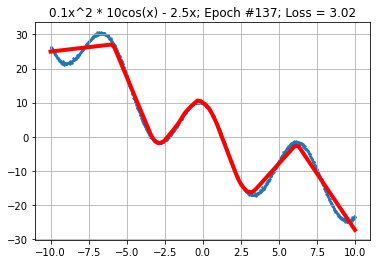

32/32 [==============================] - 0s 1ms/step


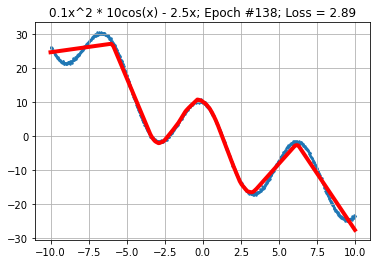

32/32 [==============================] - 0s 1ms/step


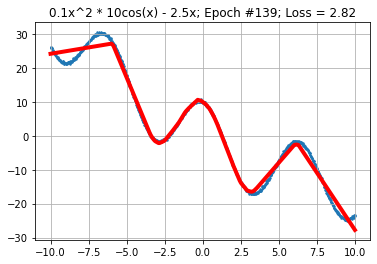

32/32 [==============================] - 0s 1ms/step


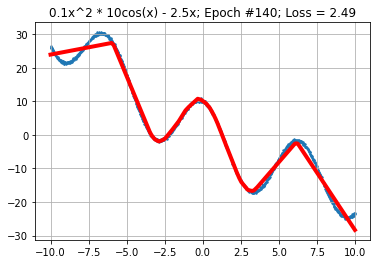

32/32 [==============================] - 0s 1ms/step


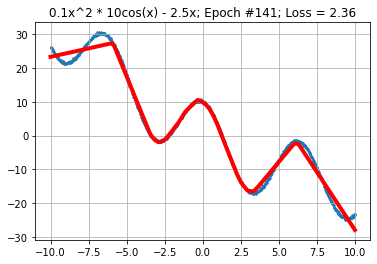

32/32 [==============================] - 0s 1ms/step


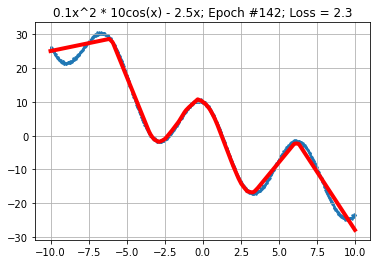

32/32 [==============================] - 0s 1ms/step


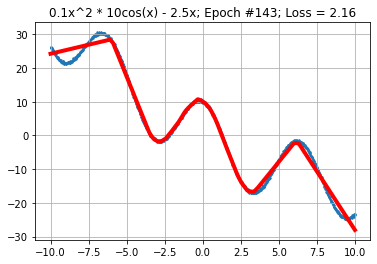

32/32 [==============================] - 0s 1ms/step


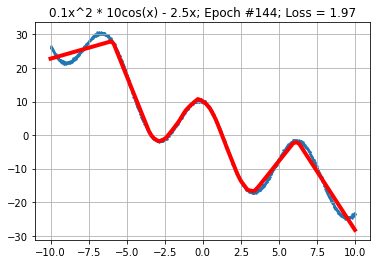

32/32 [==============================] - 0s 1ms/step


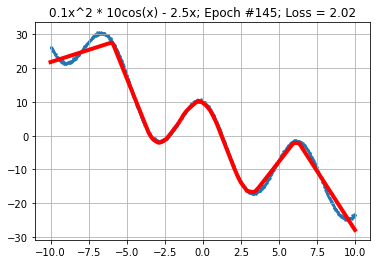

32/32 [==============================] - 0s 1ms/step


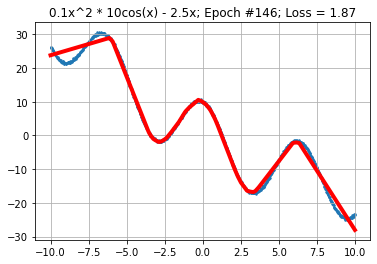

32/32 [==============================] - 0s 1ms/step


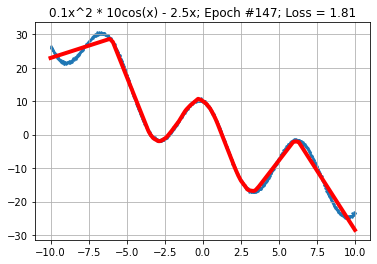

32/32 [==============================] - 0s 2ms/step


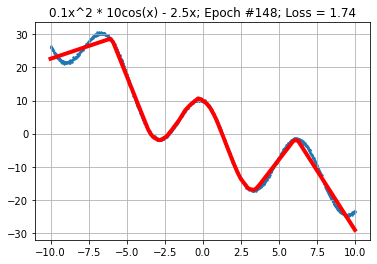

32/32 [==============================] - 0s 1ms/step


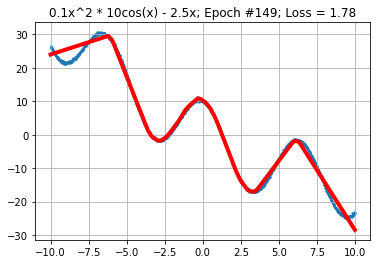

32/32 [==============================] - 0s 1ms/step


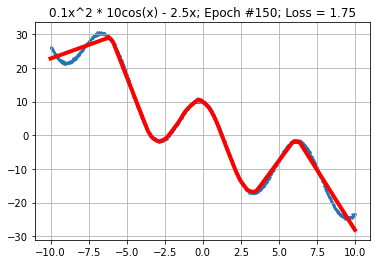

32/32 [==============================] - 0s 1ms/step


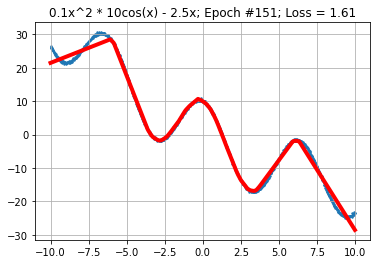

32/32 [==============================] - 0s 1ms/step


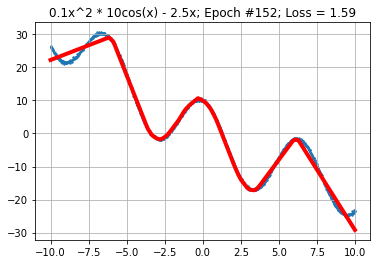

32/32 [==============================] - 0s 1ms/step


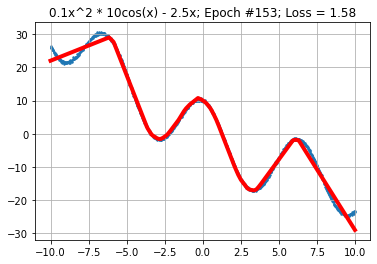

32/32 [==============================] - 0s 1ms/step


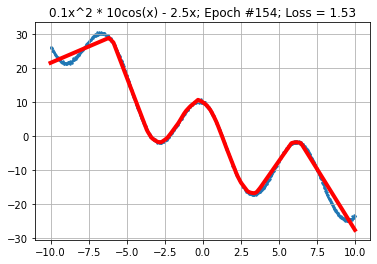

32/32 [==============================] - 0s 1ms/step


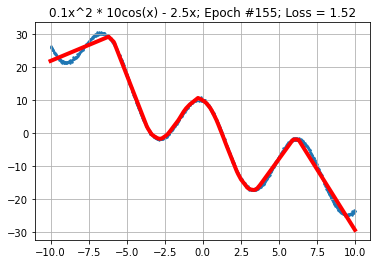

<Figure size 432x288 with 0 Axes>

In [11]:
next_n_epochs(100)

32/32 [==============================] - 0s 1ms/step


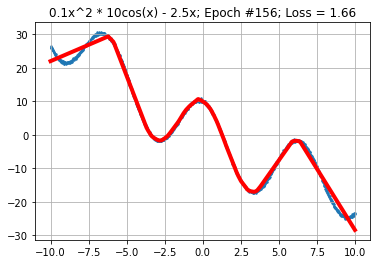

32/32 [==============================] - 0s 1ms/step


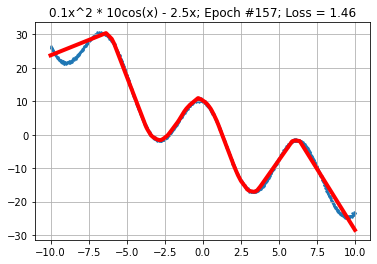

32/32 [==============================] - 0s 1ms/step


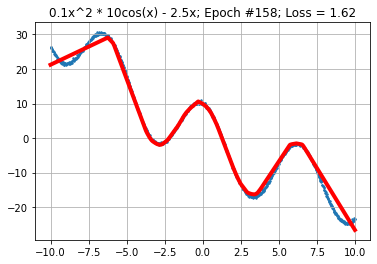

32/32 [==============================] - 0s 2ms/step


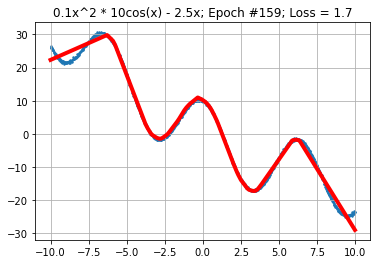

32/32 [==============================] - 0s 1ms/step


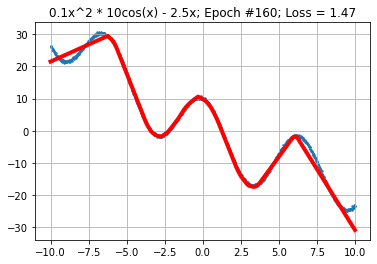

32/32 [==============================] - 0s 1ms/step


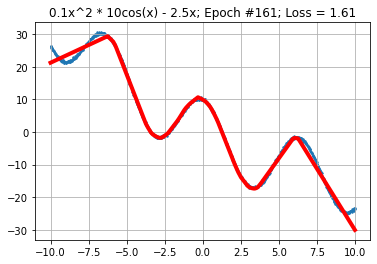

32/32 [==============================] - 0s 1ms/step


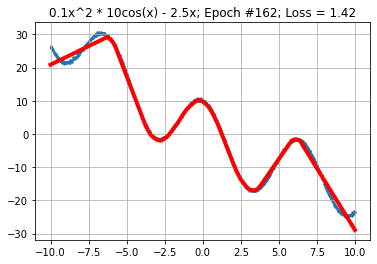

32/32 [==============================] - 0s 1ms/step


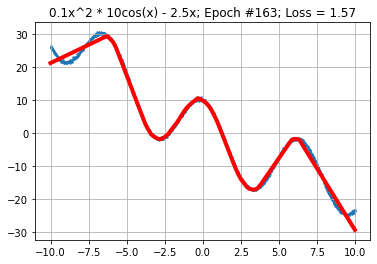

32/32 [==============================] - 0s 1ms/step


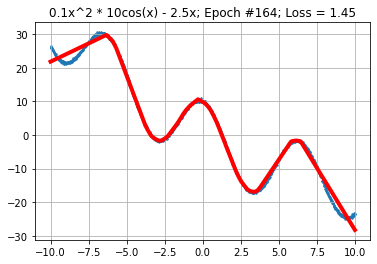

32/32 [==============================] - 0s 1ms/step


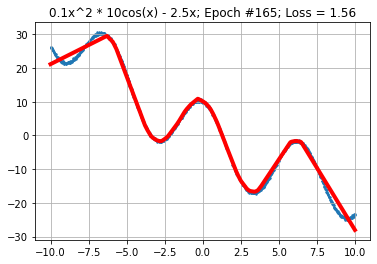

32/32 [==============================] - 0s 1ms/step


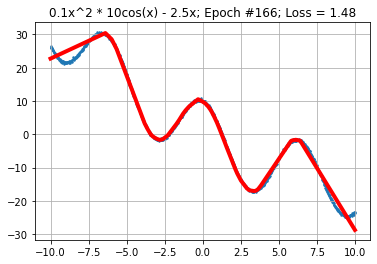

32/32 [==============================] - 0s 1ms/step


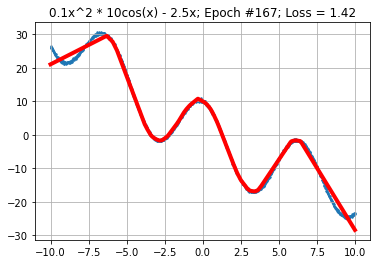

32/32 [==============================] - 0s 1ms/step


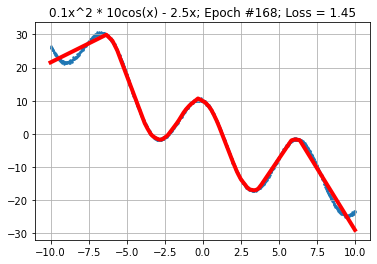

32/32 [==============================] - 0s 1ms/step


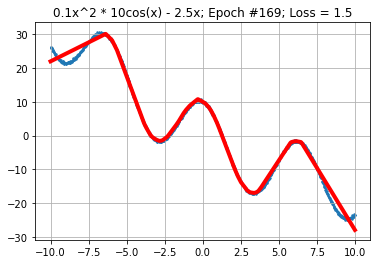

32/32 [==============================] - 0s 1ms/step


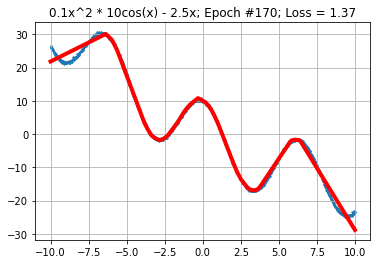

32/32 [==============================] - 0s 1ms/step


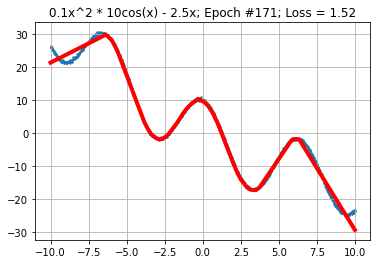

32/32 [==============================] - 0s 1ms/step


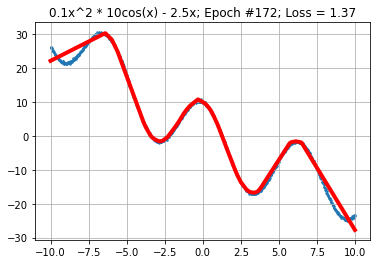

32/32 [==============================] - 0s 1ms/step


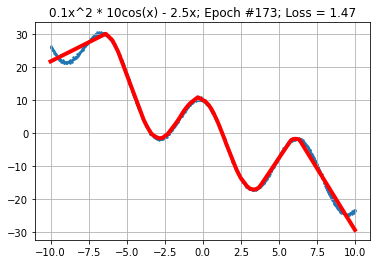

32/32 [==============================] - 0s 1ms/step


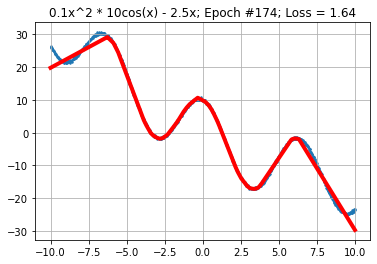

32/32 [==============================] - 0s 1ms/step


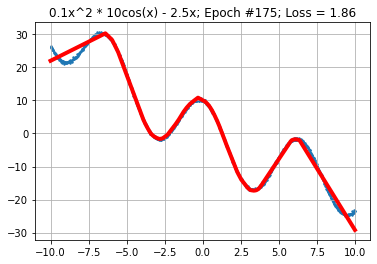

32/32 [==============================] - 0s 1ms/step


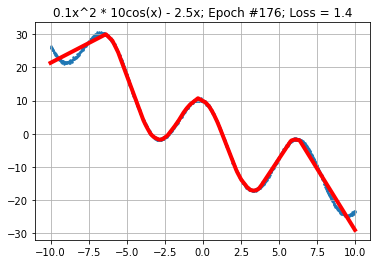

32/32 [==============================] - 0s 1ms/step


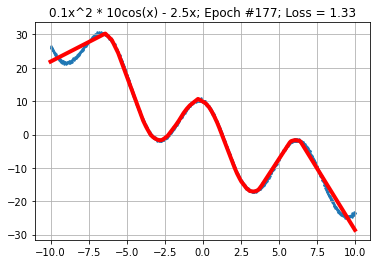

32/32 [==============================] - 0s 1ms/step


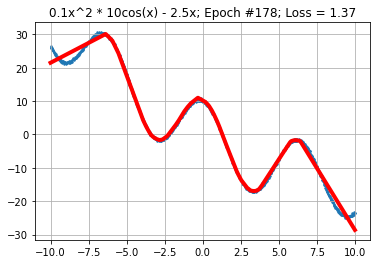

32/32 [==============================] - 0s 1ms/step


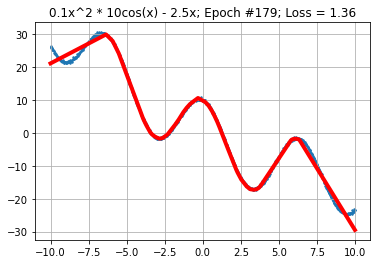

32/32 [==============================] - 0s 1ms/step


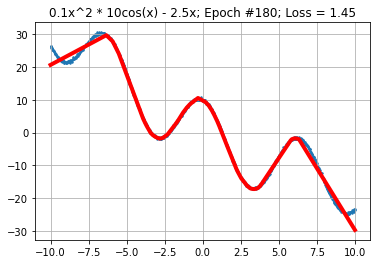

32/32 [==============================] - 0s 1ms/step


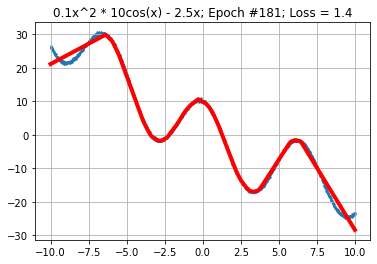

32/32 [==============================] - 0s 1ms/step


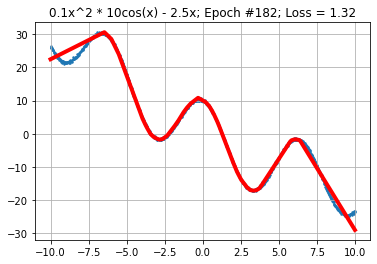

32/32 [==============================] - 0s 1ms/step


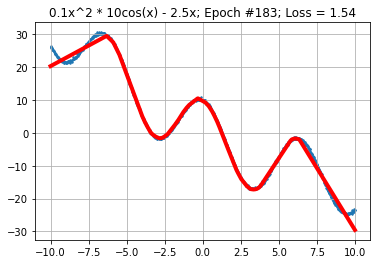

32/32 [==============================] - 0s 1ms/step


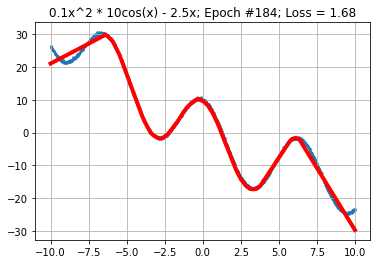

32/32 [==============================] - 0s 1ms/step


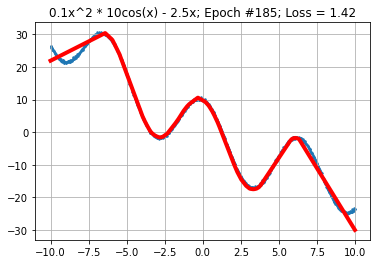

32/32 [==============================] - 0s 1ms/step


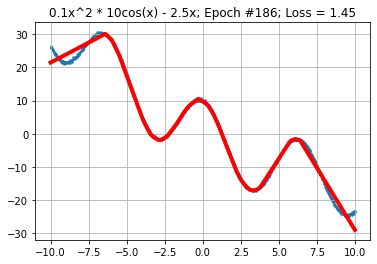

32/32 [==============================] - 0s 1ms/step


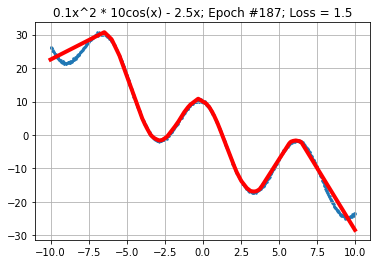

32/32 [==============================] - 0s 1ms/step


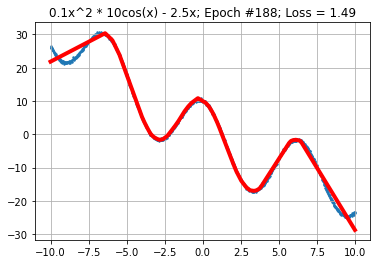

32/32 [==============================] - 0s 1ms/step


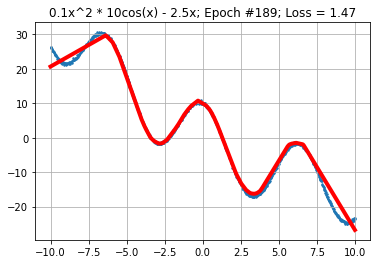

32/32 [==============================] - 0s 1ms/step


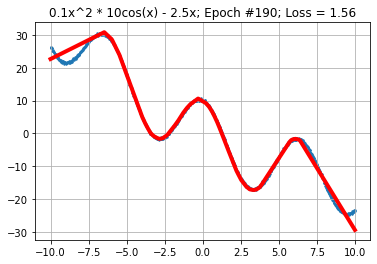

32/32 [==============================] - 0s 1ms/step


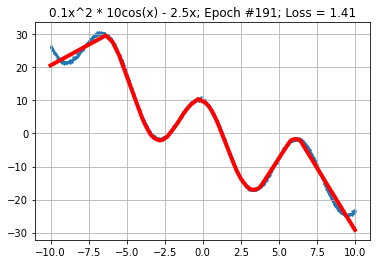

32/32 [==============================] - 0s 1ms/step


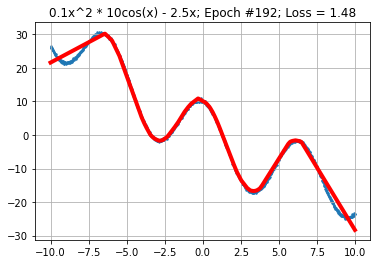

32/32 [==============================] - 0s 1ms/step


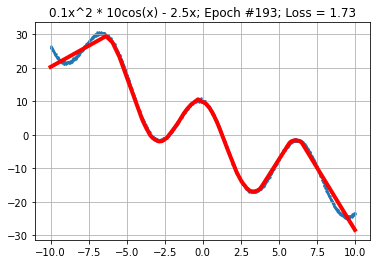

32/32 [==============================] - 0s 1ms/step


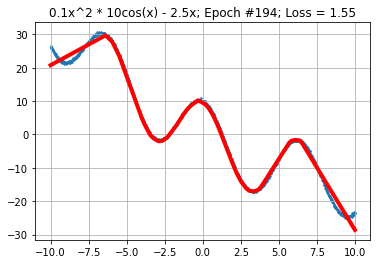

32/32 [==============================] - 0s 1ms/step


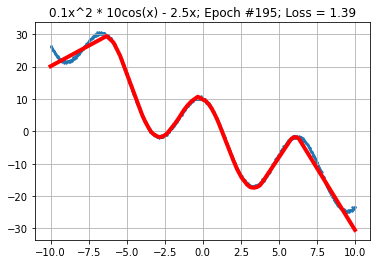

32/32 [==============================] - 0s 1ms/step


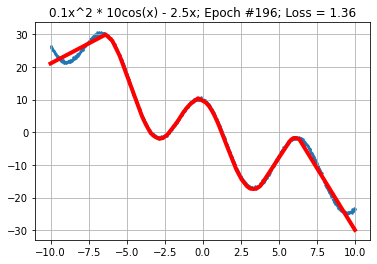

32/32 [==============================] - 0s 1ms/step


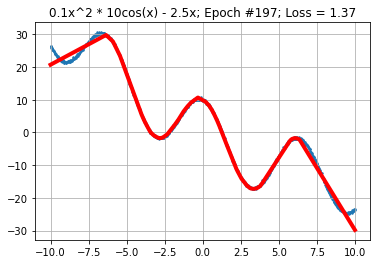

32/32 [==============================] - 0s 1ms/step


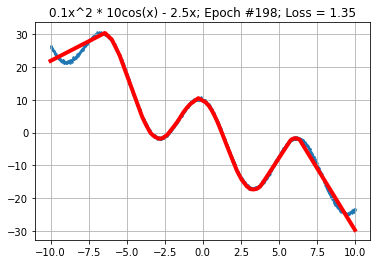

32/32 [==============================] - 0s 1ms/step


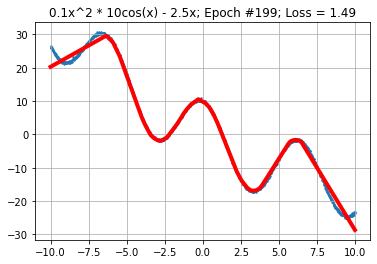

32/32 [==============================] - 0s 1ms/step


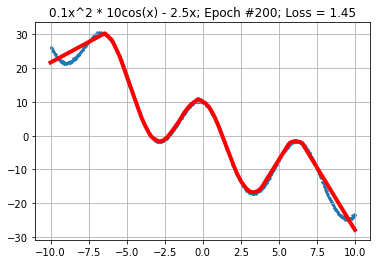

32/32 [==============================] - 0s 1ms/step


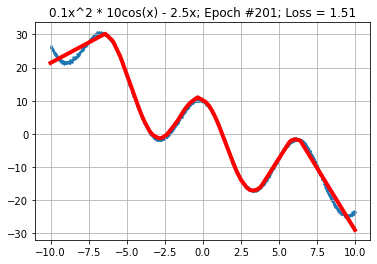

32/32 [==============================] - 0s 1ms/step


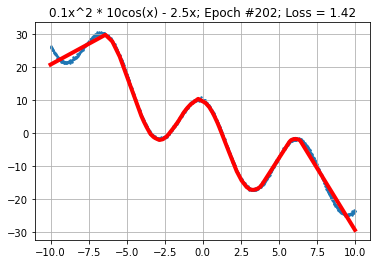

32/32 [==============================] - 0s 1ms/step


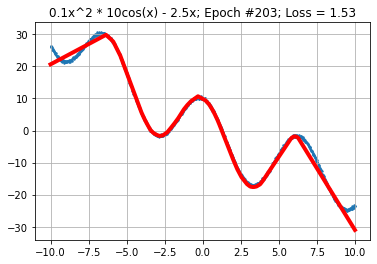

32/32 [==============================] - 0s 1ms/step


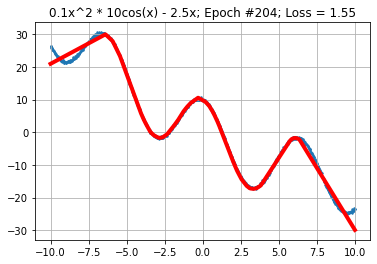

32/32 [==============================] - 0s 1ms/step


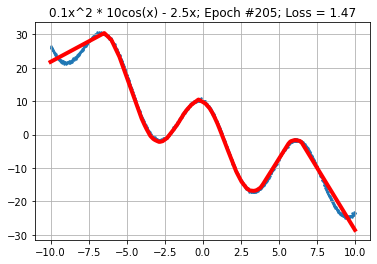

32/32 [==============================] - 0s 1ms/step


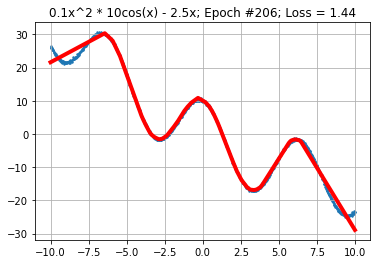

32/32 [==============================] - 0s 1ms/step


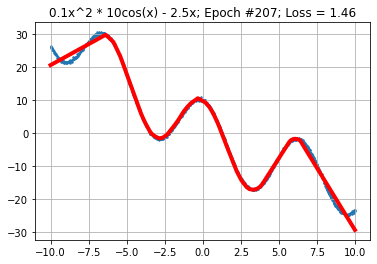

32/32 [==============================] - 0s 1ms/step


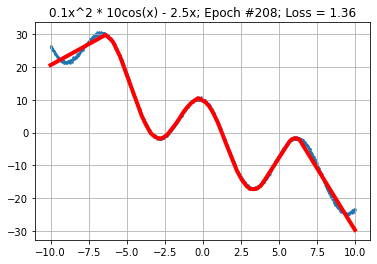

32/32 [==============================] - 0s 1ms/step


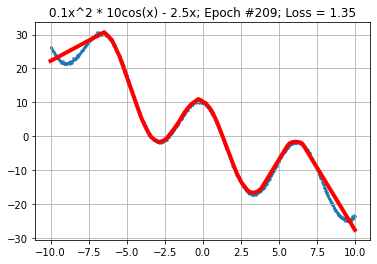

32/32 [==============================] - 0s 1ms/step


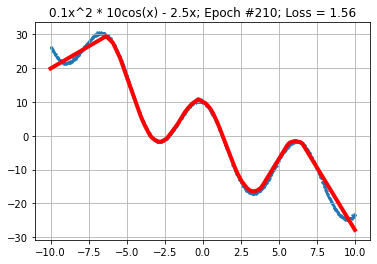

32/32 [==============================] - 0s 1ms/step


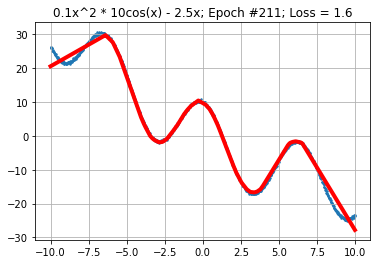

32/32 [==============================] - 0s 1ms/step


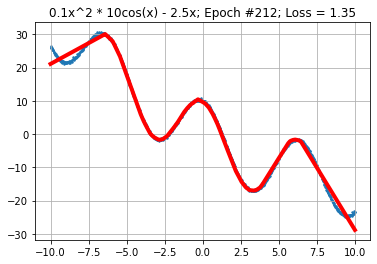

32/32 [==============================] - 0s 1ms/step


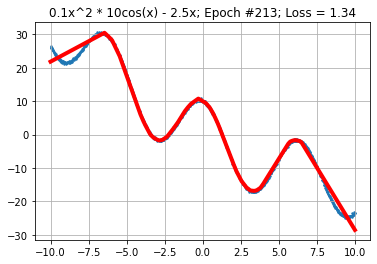

32/32 [==============================] - 0s 1ms/step


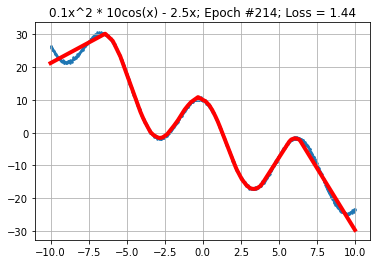

32/32 [==============================] - 0s 1ms/step


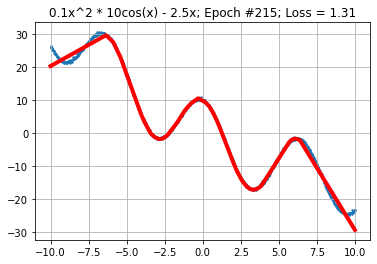

32/32 [==============================] - 0s 2ms/step


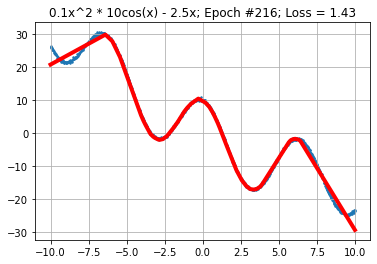

32/32 [==============================] - 0s 1ms/step


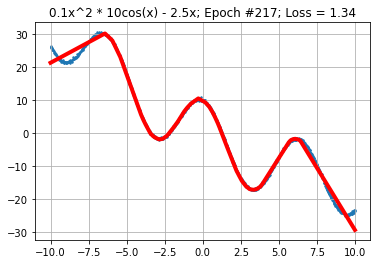

32/32 [==============================] - 0s 1ms/step


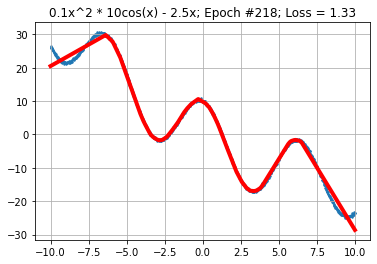

32/32 [==============================] - 0s 1ms/step


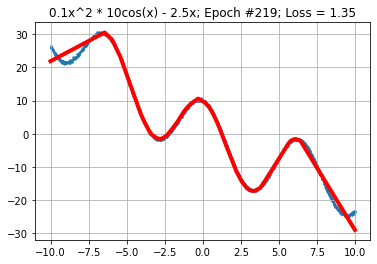

32/32 [==============================] - 0s 1ms/step


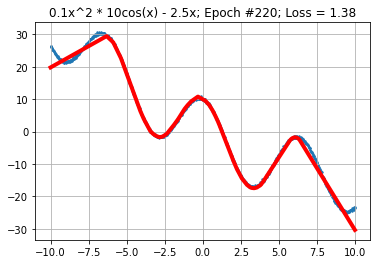

32/32 [==============================] - 0s 1ms/step


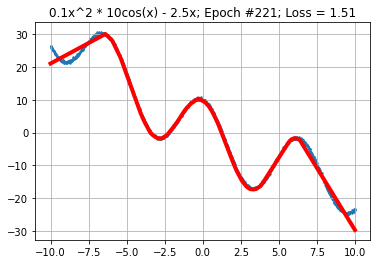

32/32 [==============================] - 0s 1ms/step


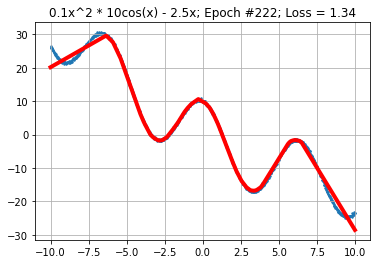

32/32 [==============================] - 0s 1ms/step


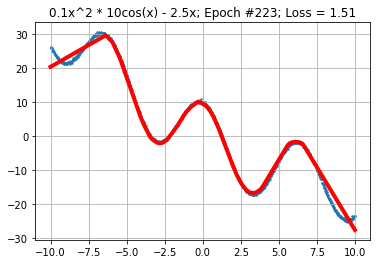

32/32 [==============================] - 0s 1ms/step


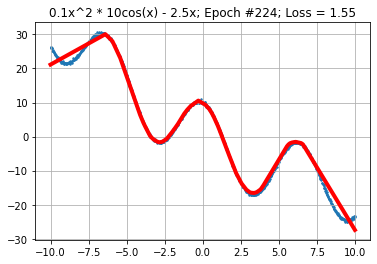

32/32 [==============================] - 0s 1ms/step


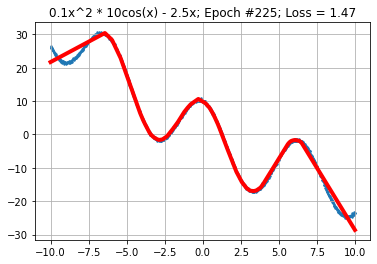

32/32 [==============================] - 0s 1ms/step


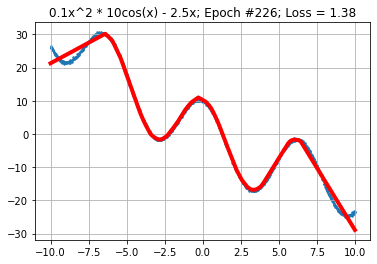

32/32 [==============================] - 0s 1ms/step


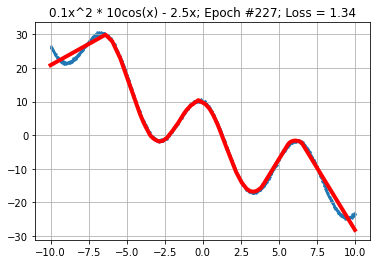

32/32 [==============================] - 0s 1ms/step


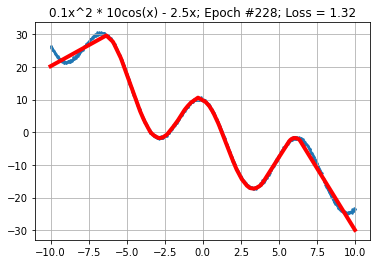

32/32 [==============================] - 0s 1ms/step


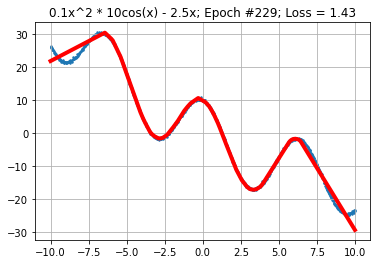

32/32 [==============================] - 0s 1ms/step


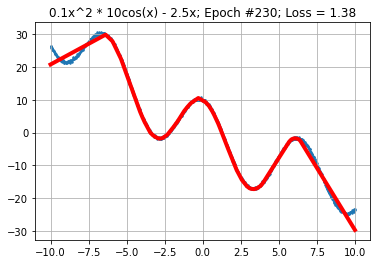

32/32 [==============================] - 0s 1ms/step


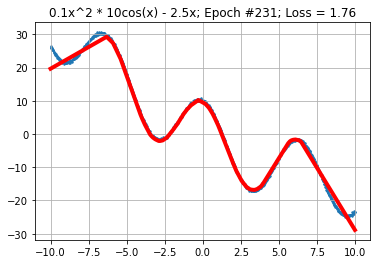

32/32 [==============================] - 0s 1ms/step


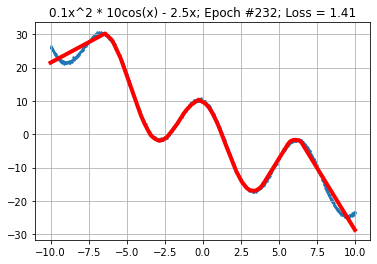

32/32 [==============================] - 0s 1ms/step


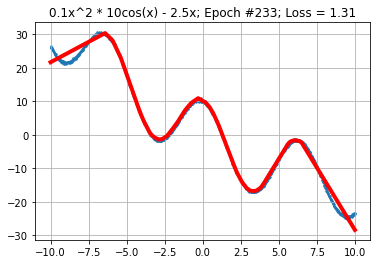

32/32 [==============================] - 0s 1ms/step


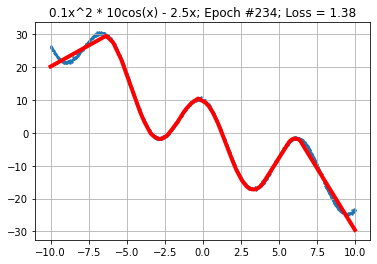

32/32 [==============================] - 0s 1ms/step


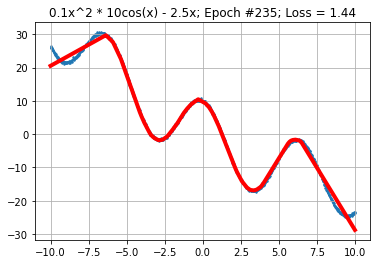

32/32 [==============================] - 0s 1ms/step


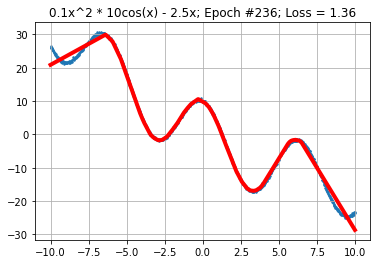

32/32 [==============================] - 0s 1ms/step


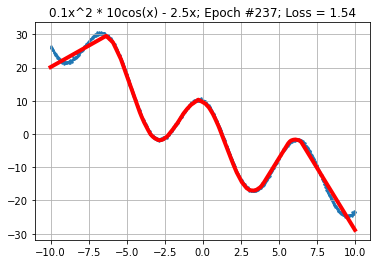

32/32 [==============================] - 0s 1ms/step


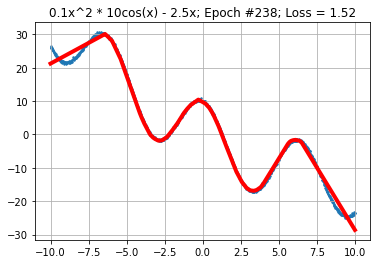

32/32 [==============================] - 0s 1ms/step


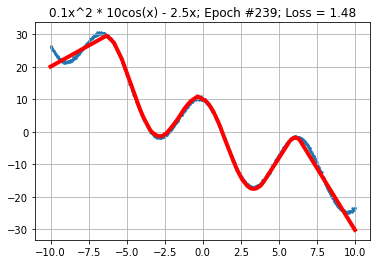

32/32 [==============================] - 0s 1ms/step


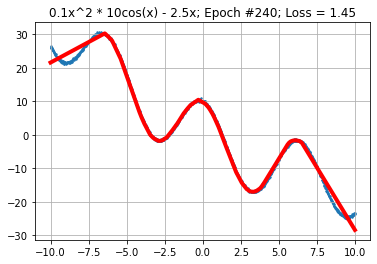

32/32 [==============================] - 0s 1ms/step


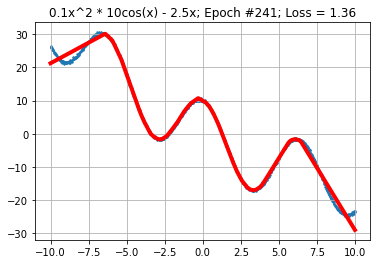

32/32 [==============================] - 0s 1ms/step


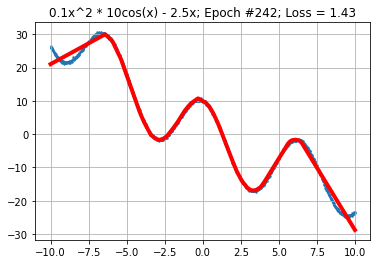

32/32 [==============================] - 0s 1ms/step


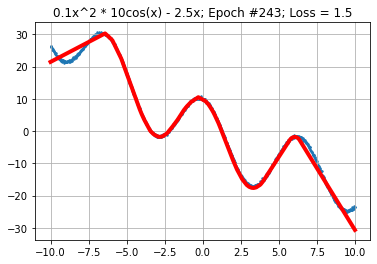

32/32 [==============================] - 0s 1ms/step


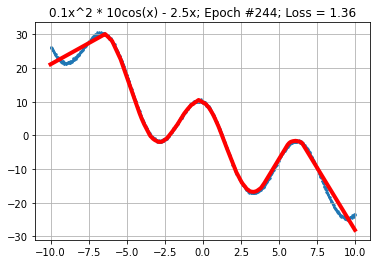

32/32 [==============================] - 0s 1ms/step


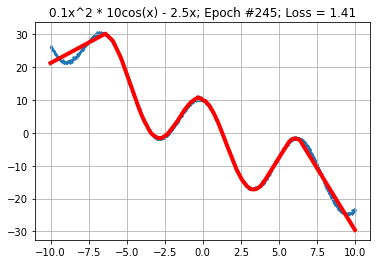

32/32 [==============================] - 0s 1ms/step


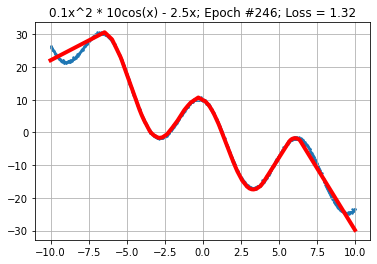

32/32 [==============================] - 0s 1ms/step


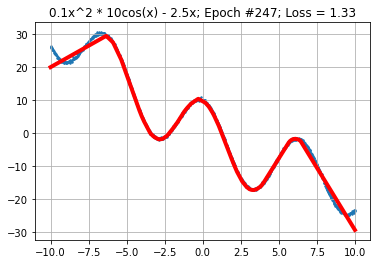

32/32 [==============================] - 0s 1ms/step


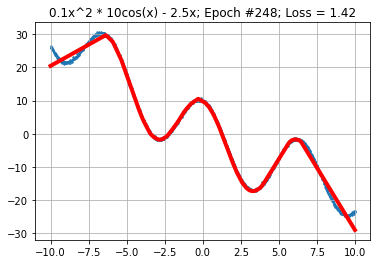

32/32 [==============================] - 0s 1ms/step


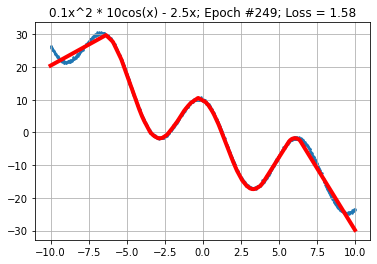

32/32 [==============================] - 0s 1ms/step


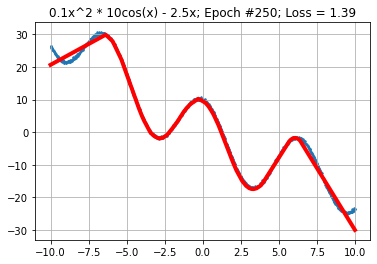

32/32 [==============================] - 0s 1ms/step


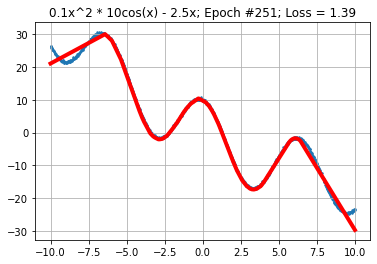

32/32 [==============================] - 0s 1ms/step


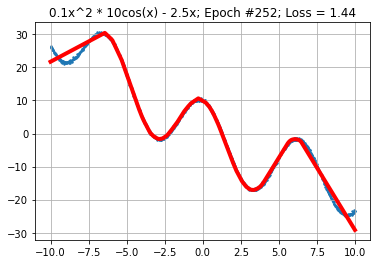

32/32 [==============================] - 0s 1ms/step


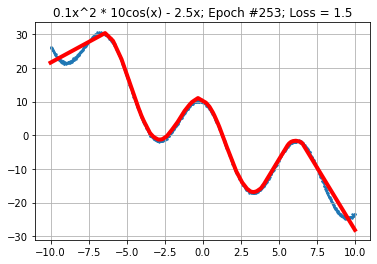

32/32 [==============================] - 0s 1ms/step


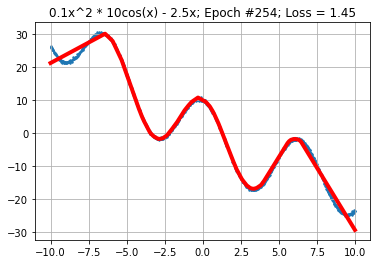

32/32 [==============================] - 0s 1ms/step


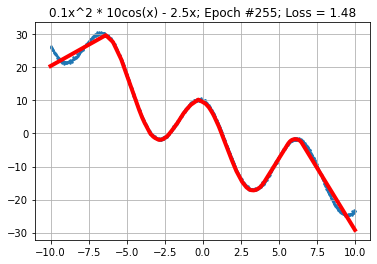

<Figure size 432x288 with 0 Axes>

In [12]:
next_n_epochs(100)